In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [3]:
dataset = pd.read_csv(r"C:\Users\Lenovo\Desktop\Time Series\air-passengers\AirPassengers.csv")

In [5]:
dataset.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [6]:
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [7]:
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


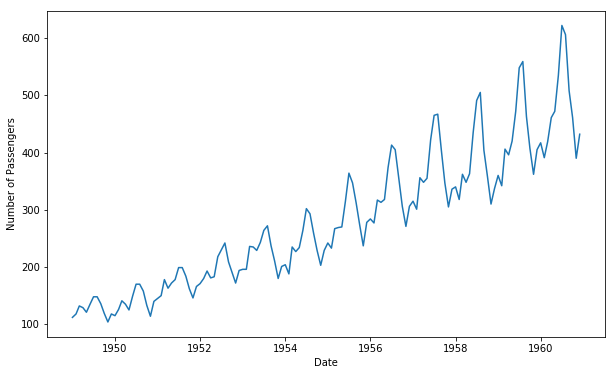

In [8]:
#Here we can see that we have a trend.
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(indexedDataset)

In [9]:
#Check for Stationarity
#Data is non Stationary because mean is not constant .For eg mean for year 1950
#is different and mean for year 1960 is different as it is trend.
#Test to check Stationarity
#1.RollingStatistics
#Since the Data is at monthly format we have given window=12
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

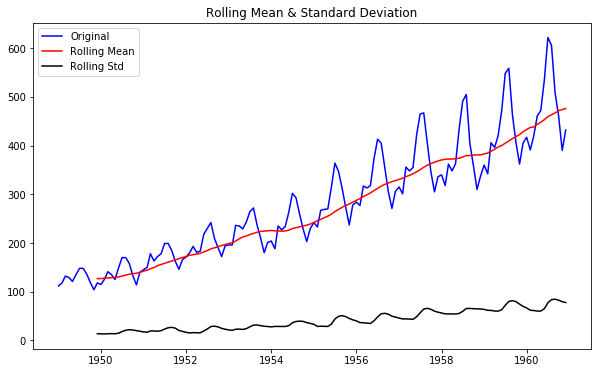

In [10]:
#Plot rolling Statistics
#data is not Stationary
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')

std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [12]:
import sys
!{sys.executable} -m pip install statsmodels

In [13]:
#Perform Dickey-Fuller test:
#AIC=Akayke Information Center
from statsmodels.tsa.stattools import adfuller
print('results of Dickey-Fuller test:')
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index =['test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
    
print(dfoutput)
#1.test statisics should be less than Crtical value to reject null hypothesis
#but here this is not the case so yes are data is non stationary because it contains null hypothesis

results of Dickey-Fuller test:
test Statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


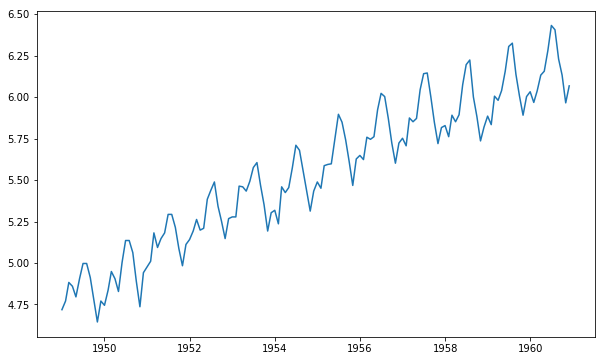

In [14]:
#Estimating Trend
#taking log value of data
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

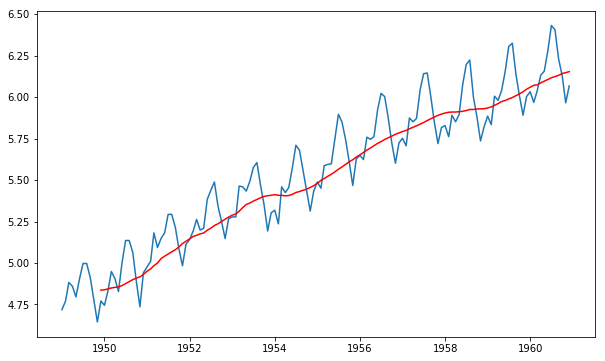

In [16]:
movingaverage = indexedDataset_logscale.rolling(window=12).mean()
movingstd=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage,color='red')
#data is not stationary again 

In [17]:
#making data stationary depends on data sometimes square,cube,log
#Here we are taking log and doing
datasetLogScaleMinusMovingAverage = indexedDataset_logscale-movingaverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [18]:
#Remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()

    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingaverage,color='red',label='Rolling Mean')
    std = plt.plot(movingstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform df test
    print('results of Dickey-Fuller test:')
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index =['test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    
    print(dfoutput)


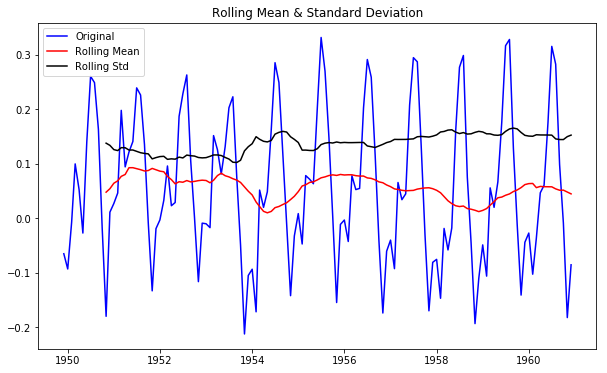

results of Dickey-Fuller test:
test Statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value(1%)              -3.486535
Critical Value(5%)              -2.886151
Critical Value(10%)             -2.579896
dtype: float64


In [20]:
test_stationarity(datasetLogScaleMinusMovingAverage)
#Now the Data is stationary

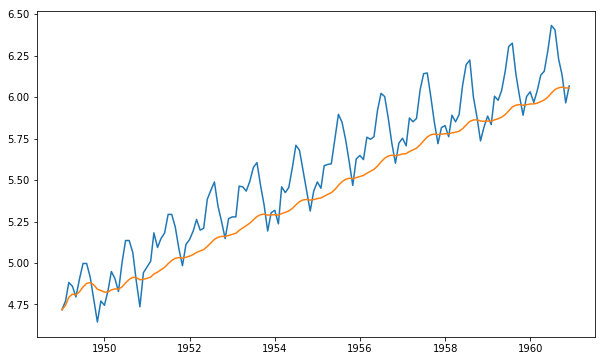

In [21]:
#Transformation using another method
#Calculated Weighted Average of Time Series
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12,min_periods = 0 , adjust = True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage)

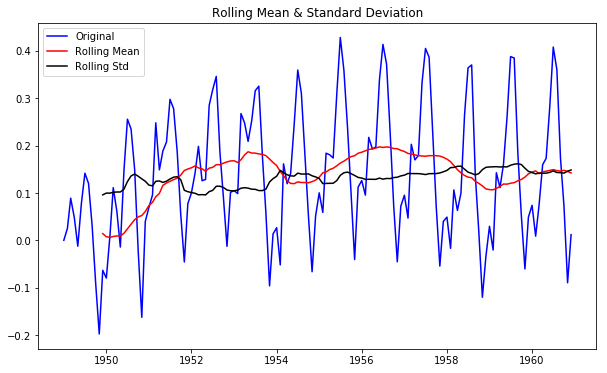

results of Dickey-Fuller test:
test Statistics                 -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponenialDecayAverage=indexedDataset_logscale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponenialDecayAverage)

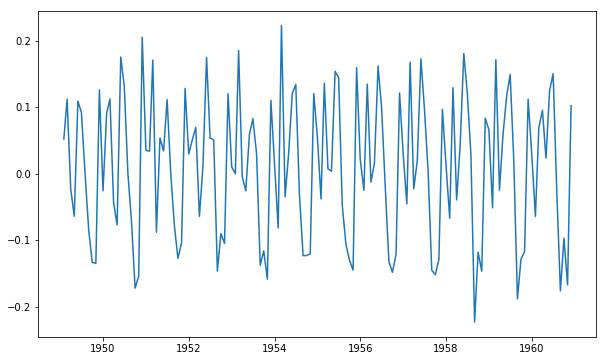

In [23]:
datasetLogDiffShifting = indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

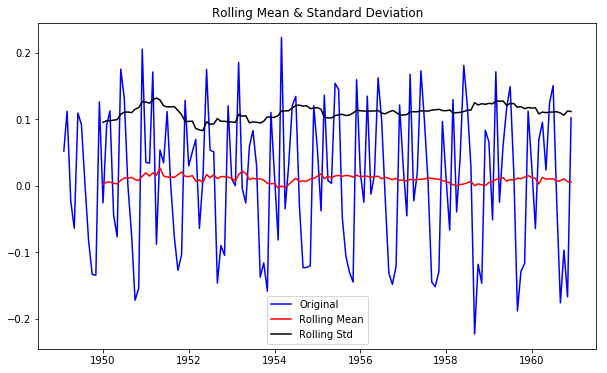

results of Dickey-Fuller test:
test Statistics                 -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value(1%)              -3.482501
Critical Value(5%)              -2.884398
Critical Value(10%)             -2.578960
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

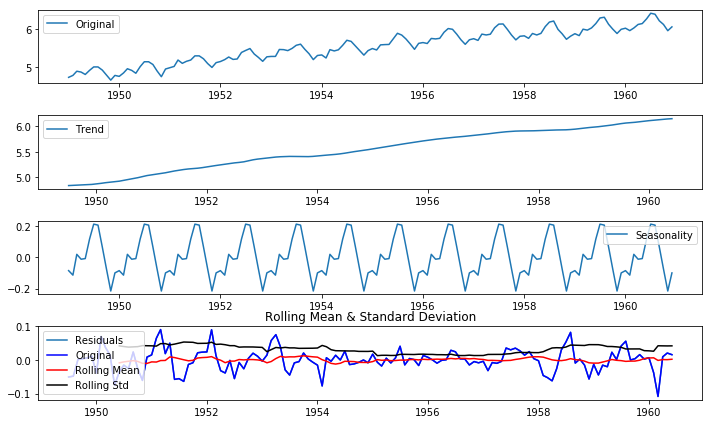

results of Dickey-Fuller test:
test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value(1%)            -3.485122e+00
Critical Value(5%)            -2.885538e+00
Critical Value(10%)           -2.579569e+00
dtype: float64


In [25]:
#Components of Timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)
trend = decomposition.trend
seasonal=decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

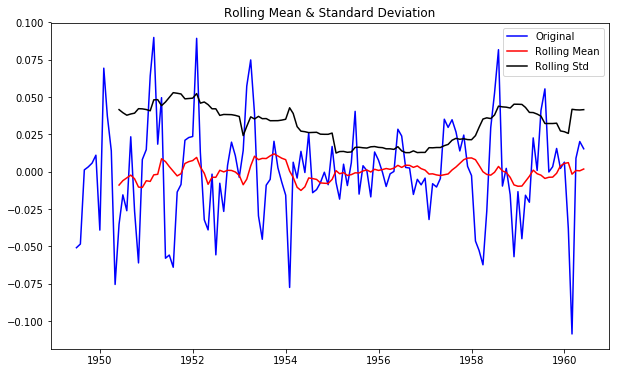

results of Dickey-Fuller test:
test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value(1%)            -3.485122e+00
Critical Value(5%)            -2.885538e+00
Critical Value(10%)           -2.579569e+00
dtype: float64


In [26]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


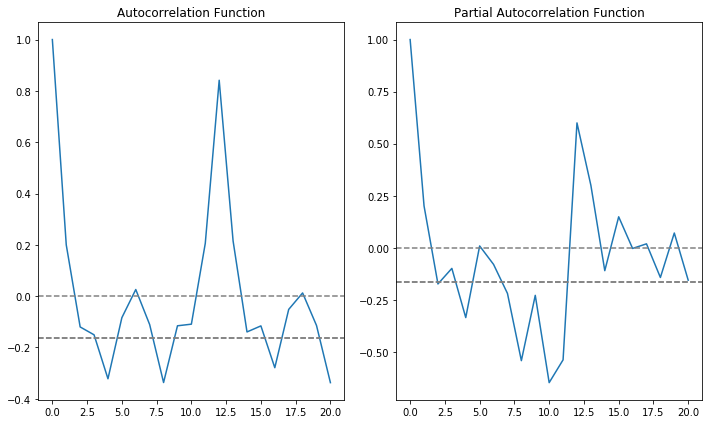

In [27]:
#In order to get the value of P and Q we need to plot acf(auto correlation) and pacf(partial auto correlation) graph
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(datasetLogDiffShifting,nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting,nlags = 20,method = 'ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


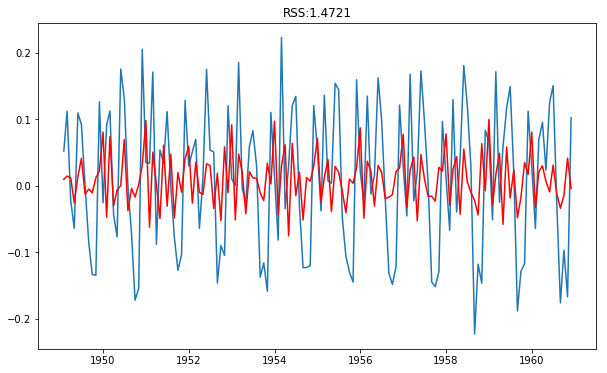

In [31]:
#To get the value of P and Q see where the graph cuts off 0 here the and is 2 from x axis
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
model = ARIMA(indexedDataset_logscale,order = (0,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color = 'red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')
#Greater the RSS bad for you

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


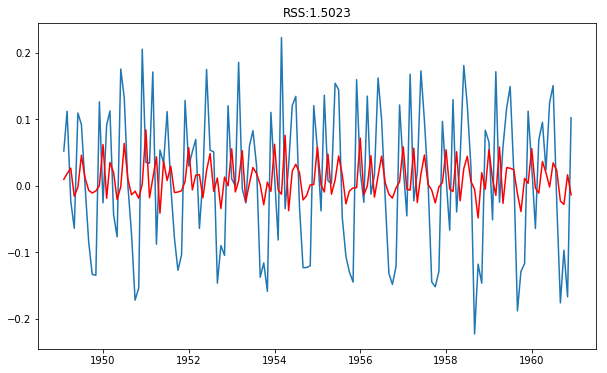

In [30]:
#MA model
#just take the value of q as 0
model = ARIMA(indexedDataset_logscale,order = (2,1,0))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color = 'red')
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


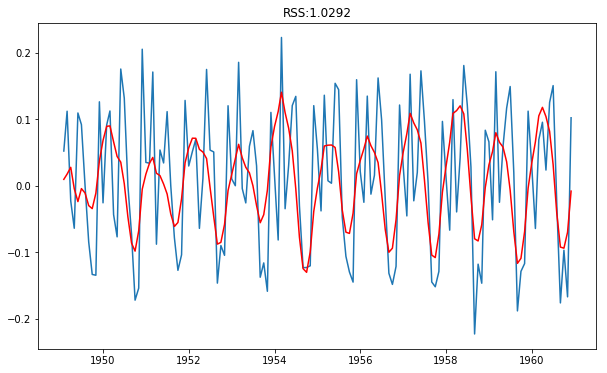

In [33]:
model = ARIMA(indexedDataset_logscale,order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color = 'red')
plt.title('RSS:%.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')


In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [35]:
#Convert to Cumulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [36]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'].ix[0],index = indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

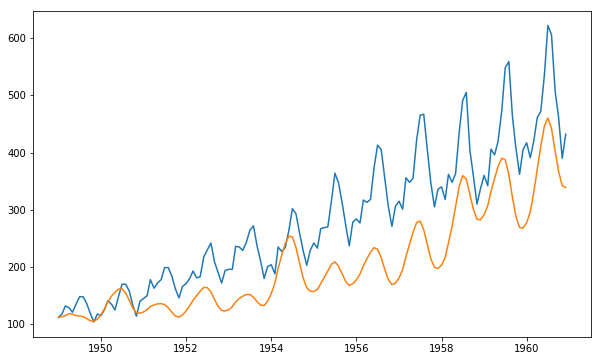

In [37]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [38]:
indexedDataset_logscale.shape

(144, 1)

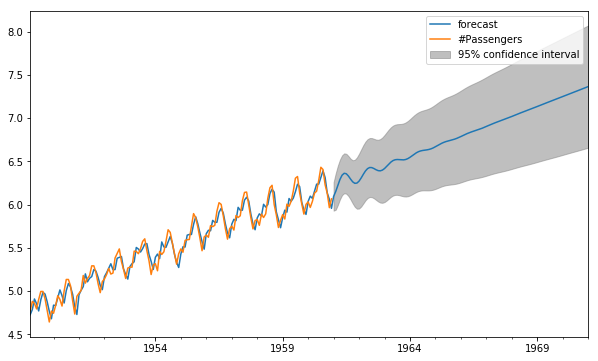

In [39]:
#predicting for next 10 years therefore 10*12=120
#144+120=264
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps = 120)

In [40]:
x[1]9

array([0.08384711, 0.10749461, 0.11568694, 0.11702774, 0.11703496,
       0.11744017, 0.11762249, 0.11778712, 0.12024161, 0.12736041,
       0.13870958, 0.15118791, 0.16157812, 0.16834392, 0.17177326,
       0.17311979, 0.17358729, 0.17385456, 0.17430214, 0.17543328,
       0.17788143, 0.18195718, 0.18726213, 0.19283389, 0.19769241,
       0.20130635, 0.20369051, 0.20519828, 0.20625264, 0.20720994,
       0.20836966, 0.21000321, 0.21229739, 0.21524473, 0.21860174,
       0.22198251, 0.22503059, 0.22755289, 0.22954801, 0.23114792,
       0.23253819, 0.23390528, 0.23541303, 0.23718305, 0.23926531,
       0.24161531, 0.24410364, 0.2465635 , 0.24885249, 0.25089622,
       0.25269726, 0.2543162 , 0.25584304, 0.2573722 , 0.25898382,
       0.26072841, 0.26261539, 0.26461081, 0.2666489 , 0.26865472,
       0.2705684 , 0.27236088, 0.27403692, 0.27562765, 0.2771782 ,
       0.27873517, 0.28033582, 0.28200008, 0.28372672, 0.285495  ,
       0.287272  , 0.28902335, 0.29072327, 0.29236073, 0.29394